# Chapter 2 - Transformer Architecture


## Introduction

At the heart of any large language model lies the transformer architecture. Introduced in the paper Attention is all you need by {cite:p}`vaswani2023attentionneed`, transformers is a set of two deep neural networks, an encoder and a decoder connected in a cascading manner to perform the translation task. Both encoders and decoders translate their inputs into an internal representation which embodies the meaning of the given text. Attention mechanism is used to create these representation. In a transalation example,
the encoder converts the whole input english text into an embedded vector,an internal represenation which captures the context of these words. The decoder during training, takes the translated german sentence, encode it into its internal representation,further uses embedded vector from encoder and translates one word a time. The below figure {numref}`Transformer-Architecture` shows the components of encoder and decoder. 


 ```{figure} ../../images/chapter2/Transformer-full.png
---
height: 750px
:name: Transformer-Architecture
---
Transformer Architecture
```

There are three types of transformers which evolved quickly after this paper was published

1. Encoder - Decoder transformers
    They include both encoders and decoders. Translation models uses these architecture.T5, BART etc. Their pre-training is task dependent. Tasks that involve both understanding and generating data. They first encode an input sequence into an internal represenation and then decode this represenation into an output sequence.

2. Encoder only Transformers  
    Models like BERT are encoder only transfomer.Their task involves only understanding. They are trained to do masked word prediction. Given a sentence, one of the word will be masked. Encoder only models are heavily used in classification tasks.
    
3. Decoder only Transformers
    In this book we will be looking at decoder only models. Decoder only models are trained to perform text generation. These models are also called as autoregressive models.
    

The secret sauce in encoder / decoder architecture is the multi-head attention module. It is this attention mechanism module which claims to provide better contextual information and long term dependency features present in the input text data to the model. Let us lookat the following two examples

1. The river bank is not accessible to the tourist.
2. The robbers had planned a heist of major banks in the city.


Both the example sentences have the word "bank". The context in the first sentence is "river" and the second sentence is "heist".  We want the model to treat the word "bank" with respect to their context in the sentence. Another example,

1. I went to the library yesterday, there i forgot my book. I am returning there today.

As an English reader, if I ask you a question "Were am I returning?", you know that I am returning to the library. The previous sentence has the clue. This is a trivial example for long term dependency.


This is where attention mechanism comes to rescue. Using attention mechanism we inject contextual information and long term dependency in to the model. We saw word embeddings in the previous chapter. Each word or a token had a unique position in the embedding space. However as we saw in the previous examples, these embeddings need to account for the contextual information in the input text. Attention mechanism adds these contextual information to the vector representaion of the token. More about attention in the subsequent sections.



ALl the examples in this book are decoder only architecture. It is the widely used architecture for building causal LLMs.

In this chapter we will see in detail about the components inside a decoder only transformer model.

## Decoder only Transformers


The below figure {numref}`GPT2` depicts the a GPT2 like decoder only transformer architecture It is a decoder only transfomer. As you can see there is no encoder module.



 ```{figure} ../../images/chapter2/GPT2.drawio.png
---
height: 750px
:name: GPT2
---
GPT2 Like Architecture
```

The input, combined word and position embeddings is fed to a series of transformer blocks. The final transformer block output is fed to a linear layer producing logits. This logits is further passed through a softmax functiont to get the probability distribution over the vocabulary.

The transformer block consist of 


## Scaled Self-Attention

Sometime while performing average of numbers, we assign weights to different numbers; this is weighted averaging. Varied attention is given to different numbers.In the example below we show a weighted average example by restricting the contribution of the three entities, to ten, thirty and sixty percentages. Let us take some liberty here for the sake for quickly grasping the concept of self-attention. Instead of calling these as weights, lets call them as attention. Rewriting the previous sentence, we have restricted the attention the average function can give to these three entities as 10, 30 and 60 percent.


In [2]:
weights  = (0.1, 0.3, 0.6)
entities = (90.,120.,100.)

normal_average = sum(entities) / len(entities)

weighted_sum   = (x*y for x,y in zip(weights, entities))
weighted_average = sum(weighted_sum) / len(entities)

 
print(f"Average Normal {normal_average:.3f} \
    Weighted {weighted_average:.2f}")

Average Normal 103.333     Weighted 35.00


So, what is self attention. Say we have six tokens in our input, "The boat left the river bank." 
For each token we have a vector represenation in the form of embedding. If we take a dot product of the vectors for "The" and "boat", it gives us the strength of their relationship. Refer to previous chapter for vector represenation of words. So say we have an initial embedding for word "The". Now we do a dot product of word "the" and "boat", followed by dot product of "The" and "left" and so on. Let us call them attention weights, the strength of relationship between those words. 

When we start training a transformer for a language task, we choose to initialize these word embeddings in a random fashion leaving us with no control over the scale of the embedding values. Attention paper proposes to scale these values using square root of the embedding dimension. Hence we call this attention as scaled attention. After scaling we normalize normalize these weights to fall between zero and one. Normalizing the values help in stabilized training of LLM. 

Finally we will enrich the embedding representation of each word with these scaled normalized attention weights. We take the embedding for the word "The", we multiply it with attention weight for "The". The embedding for "The" is now enriched with its relationship with itself. To this add the next enriched vector, the embedding vector for "The" multipled by attention weight for the word "boat" and so on. The final vector called context vector for the word "The" is thus formed by addition. Through this weighted sum, the context vector for each word is now enriched by their strength of relationship with their neighbors. The input is enriched by its constituents and hence the name self-attention.

To sum up scaled self-attention, the input is enriched by its constituents and hence self, the contribution of the words in the input to each other is the attention and finally these attention weights are scaled by square root of embedding dimension and hence scaled is used in naming this.


```{note}
dot product explanation comes here.

```

To demonstrate this concept, let us create some dummy word embeddings. For the purpose of illustration we we will stick with word tokens and not their integer encoding. In the previous chapter we studied about integer encoding followed by token embedding. For bruety purpose let us skip directly to token embeddings.

In [3]:
import numpy as np
input_tokens = ["The", "boat", "left", "the", "river", "bank"]
embd_dim =4

generate_embdgs = np.random.normal(size=(embd_dim,))
token_embedding = np.array([generate_embdgs * np.random.rand() \
                            for i in range(len(input_tokens))])
token_embedding

array([[-1.33480422,  0.66683943, -0.81312097, -0.23173285],
       [-1.00952375,  0.50433631, -0.61497028, -0.17526152],
       [-0.83232717,  0.41581272, -0.50702767, -0.14449875],
       [-0.36488208,  0.18228722, -0.22227475, -0.06334649],
       [-0.74279219,  0.37108297, -0.45248576, -0.12895475],
       [-0.20128171,  0.10055601, -0.12261452, -0.03494414]])

With these embeddings, now let us calcuate the reltionship strength of firt word "The" with all the words in the input sequence.

In [4]:
first_word_initial_vector = token_embedding[0]

attention_scores_first_word = np.zeros(len(input_tokens),)

for idx, each_word_vector in enumerate(token_embedding):
    attention_scores_first_word[idx] = \
            np.dot(first_word_initial_vector, each_word_vector)

for i in range(len(attention_scores_first_word)):
    print(f"Strength betwen '{input_tokens[0]}' \
        and '{input_tokens[i]}' {attention_scores_first_word[i]:.2f}")
    

Strength betwen 'The'         and 'The' 2.94
Strength betwen 'The'         and 'boat' 2.22
Strength betwen 'The'         and 'left' 1.83
Strength betwen 'The'         and 'the' 0.80
Strength betwen 'The'         and 'river' 1.64
Strength betwen 'The'         and 'bank' 0.44


The stength score array now has the relationship strengths. Using we can now created a weighted sum for the word "The". Let us normalize these scores using softmax function

In [5]:
from scipy.special import softmax

attention_scores_first_word = attention_scores_first_word * (1/np.sqrt(embd_dim))
attention_weights_first_word = \
    softmax(attention_scores_first_word)

print(f"Attention weights {attention_weights_first_word} \
        sum of weights {sum(attention_weights_first_word)}")

Attention weights [0.2919817  0.20403941 0.16785268 0.10029128 0.15208529 0.08374964]         sum of weights 1.0


Normalized attention weights sums up to 1.0. Softmax is useful in dealing with extreme values. Let us try to see the difference in code below.

In [6]:
x = np.asarray([0.14,0.48,10000,0,47])
x_normalized = x / sum(x)
print(f"Normalized values {x_normalized}")
print(f"Softmax Normalization {softmax(x)}")

Normalized values [1.39336480e-05 4.77725073e-05 9.95260569e-01 0.00000000e+00
 4.67772468e-03]
Softmax Normalization [0. 0. 1. 0. 0.]


With softmax we get more numerical stability, so we can avoid underflow and overflow problems during gradient calcualtions and backprobagation.

In [7]:
first_word_context_vector = np.zeros(first_word_initial_vector.shape)

for idx, score in enumerate(attention_weights_first_word):
    first_word_context_vector += token_embedding[idx] * score

first_word_context_vector

array([-0.90184891,  0.45054428, -0.54937814, -0.15656829])

### Vectorization for all the words

Repeate the same process for each word in the squence. Using matrix operation we can vectorize attention calculation.

In [9]:
import math

attention_scores = np.dot(token_embedding, token_embedding.T)
attention_scores = attention_scores * (1/math.sqrt(embd_dim))
attention_scores

array([[1.47062148, 1.11224349, 0.91701703, 0.40200909, 0.81837181,
        0.22176227],
       [1.11224349, 0.84119918, 0.69354775, 0.30404288, 0.61894154,
        0.16772068],
       [0.91701703, 0.69354775, 0.57181284, 0.25067577, 0.51030187,
        0.13828152],
       [0.40200909, 0.30404288, 0.25067577, 0.1098932 , 0.22371012,
        0.06062093],
       [0.81837181, 0.61894154, 0.51030187, 0.22371012, 0.45540775,
        0.12340632],
       [0.22176227, 0.16772068, 0.13828152, 0.06062093, 0.12340632,
        0.03344063]])

In [10]:
attention_scores_first_word

array([1.47062148, 1.11224349, 0.91701703, 0.40200909, 0.81837181,
       0.22176227])

Compare the first row with our prevoius strength_score array.The first row here represents the strength score between word "The" and all the other words in the sequence. The second row represents the relationship between word "boat" and all hte other words.

In [11]:
attention_weights = softmax(attention_scores,axis=1)
attention_weights

array([[0.2919817 , 0.20403941, 0.16785268, 0.10029128, 0.15208529,
        0.08374964],
       [0.25869083, 0.19727315, 0.17019382, 0.11528796, 0.1579584 ,
        0.10059583],
       [0.24118358, 0.19288402, 0.17077624, 0.12386808, 0.16058818,
        0.11069989],
       [0.19761292, 0.17917159, 0.16986039, 0.14755401, 0.1653412 ,
        0.1404599 ],
       [0.23253037, 0.19048826, 0.17087818, 0.12829844, 0.16175078,
        0.11605397],
       [0.18338032, 0.17373318, 0.16869317, 0.15608815, 0.1662024 ,
        0.15190277]])

We have all the attention weights. You can compare the attention weights for the first word "The" with the first row of the matrix.

In [12]:
attention_weights_first_word

array([0.2919817 , 0.20403941, 0.16785268, 0.10029128, 0.15208529,
       0.08374964])

In [13]:
context_vectors = np.dot(attention_weights, token_embedding)

### Masking

Another important concept to grasp before we move further is Masking. Let us see what is masking and why need masking. We perform masking to avoid data leakage. While we train the transformer to perform the next word prediction, we should avoid giving any information about the next word it is supposed to predict.In the previous example, while doing the weighted sum addition, we enriched the vector representation for word "The" w the ith all the other words in the sequence. While we expect the transformer to predict, "Boat" after "The", we have introduced leakage by providing information about "Boat" to the model while training.

Remember the context vector creation. We enrich the original embedding vector with attention scores. We dont want to enrich word "The" with the scores of "boat" before the model sees the word "boat". In the next step, when the model sees the word "The" and "boat", we will enrich it with the scores from "boat". We can do this by using a mask, where we will mask the upper triangle of our attenion score matrix.

Let us create a mask matrix of the same shape as our attention_weights matrix. Set the lower triangle part of this matrix as 1 and the upper triangle as 0.

In [14]:

mask = np.zeros_like(attention_scores, dtype=bool)
mask[np.tril_indices_from(attention_scores)] = True
mask

array([[ True, False, False, False, False, False],
       [ True,  True, False, False, False, False],
       [ True,  True,  True, False, False, False],
       [ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True]])

Apply this mask over attention_scores matrix.

In [15]:
attention_scores_masked = attention_scores * mask
attention_scores_masked

array([[1.47062148, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [1.11224349, 0.84119918, 0.        , 0.        , 0.        ,
        0.        ],
       [0.91701703, 0.69354775, 0.57181284, 0.        , 0.        ,
        0.        ],
       [0.40200909, 0.30404288, 0.25067577, 0.1098932 , 0.        ,
        0.        ],
       [0.81837181, 0.61894154, 0.51030187, 0.22371012, 0.45540775,
        0.        ],
       [0.22176227, 0.16772068, 0.13828152, 0.06062093, 0.12340632,
        0.03344063]])

We should have a masked attention scores matrix, where all the upper triangular entries are set to zero. Let us set those zero values to minus infinity.

In [16]:
attention_scores_masked[attention_scores_masked == 0]= -np.inf
attention_scores_masked

array([[1.47062148,       -inf,       -inf,       -inf,       -inf,
              -inf],
       [1.11224349, 0.84119918,       -inf,       -inf,       -inf,
              -inf],
       [0.91701703, 0.69354775, 0.57181284,       -inf,       -inf,
              -inf],
       [0.40200909, 0.30404288, 0.25067577, 0.1098932 ,       -inf,
              -inf],
       [0.81837181, 0.61894154, 0.51030187, 0.22371012, 0.45540775,
              -inf],
       [0.22176227, 0.16772068, 0.13828152, 0.06062093, 0.12340632,
        0.03344063]])

Softmax function, will handle the negative infinity value and set it to zero.

In [17]:
attention_weights_masked = softmax(attention_scores_masked,axis=-1)
attention_weights_masked

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.56734926, 0.43265074, 0.        , 0.        , 0.        ,
        0.        ],
       [0.39875346, 0.31889888, 0.28234766, 0.        , 0.        ,
        0.        ],
       [0.28466325, 0.25809835, 0.24468547, 0.21255293, 0.        ,
        0.        ],
       [0.26305946, 0.21549761, 0.19331291, 0.14514285, 0.18298717,
        0.        ],
       [0.18338032, 0.17373318, 0.16869317, 0.15608815, 0.1662024 ,
        0.15190277]])

Finally using this masked attention weights, we calculate the context vector.

In [18]:
context_vectors = np.dot(attention_weights_masked, token_embedding)
context_vectors

array([[-1.33480422,  0.66683943, -0.81312097, -0.23173285],
       [-1.19407139,  0.59653233, -0.72739093, -0.20730049],
       [-1.08919942,  0.54414056, -0.66350621, -0.18909386],
       [-0.92174124,  0.46048206, -0.56149592, -0.16002176],
       [-0.91846389,  0.45884477, -0.55949946, -0.15945279],
       [-0.77155538,  0.38545244, -0.47000739, -0.13394828]])

The context vector for the word "The" is not enriched by other words in the input. The last word has the enrichment of all the words.

### Scaled dot product self-attention in Pytorch


The below code implements the attention mechanism in Pytorch. SLLMConfig class is a datastructure to store the model parameters.

We implement the attention mechanism in the class SingleHeadAttention.

Here is the torch implementation "torch.nn.functional.scaled_dot_product_attention" of scaled dot product attention. Going forward we will be using this version
inside our source code.

https://pytorch.org/docs/stable/generated/torch.nn.functional.scaled_dot_product_attention.html

<Need to rewrite it>

The documentation warns that its a beta version and subject to change. In addition to standard implementation similar to our example, this also implements three other versions,

1. Flash attention {cite}`dao2023flashattention2fasterattentionbetter`

The attention layer is the main bottleneck in scaling to longer sequences, as its runtime and memory increase quadratically in the sequence length. FlashAttention exploits the asymmetric GPU memory hierarchy to bring significant memory saving (linear instead of quadratic) and runtime speedup (2-4× compared to optimized baselines), with no approximation.

The attention layer is the main bottleneck in scaling to longer sequences, as its runtime and memory increase quadratically in the sequence length. FlashAttention exploits the asymmetric GPU memory hierarchy to bring significant memory saving (linear instead of quadratic) and runtime speedup (2-4× compared to optimized baselines), with no approximation.

2. Memory effiecient

3. C++ implementation

Scaled dot product attention attempts to automatically select the most optimal implementation based on the inputs. In order to provide more fine-grained control over what implementation is used, the following functions are provided for enabling and disabling implementations. The context manager is the preferred mechanism:

        torch.nn.attention.sdpa_kernel(): A context manager used to enable or disable any of the implementations.

        torch.backends.cuda.enable_flash_sdp(): Globally enables or disables FlashAttention.

        torch.backends.cuda.enable_mem_efficient_sdp(): Globally enables or disables Memory-Efficient Attention.

        torch.backends.cuda.enable_math_sdp(): Globally enables or disables the PyTorch C++ implementation.


    

In [20]:
import torch
from torch.nn.functional import scaled_dot_product_attention

torch_tensor = torch.tensor(token_embedding)

attn_torch = scaled_dot_product_attention(
        query = torch_tensor
       ,key   = torch_tensor
       ,value = torch_tensor
       ,attn_mask=None, dropout_p=0.0, is_causal=True, scale=None
)

print(attn_torch.shape)
attn_torch

torch.Size([6, 4])


tensor([[-1.3348,  0.6668, -0.8131, -0.2317],
        [-1.1941,  0.5965, -0.7274, -0.2073],
        [-1.0892,  0.5441, -0.6635, -0.1891],
        [-0.9217,  0.4605, -0.5615, -0.1600],
        [-0.9185,  0.4588, -0.5595, -0.1595],
        [-0.7716,  0.3855, -0.4700, -0.1339]], dtype=torch.float64)

In [22]:
from dataclasses import dataclass
import torch
import torch.nn as nn
import math
import torch.nn.functional as F

torch.manual_seed(4752)

@dataclass
class SLLMConfig:
    # Embedding dimension
    d_model: int = 512
    # Query key Value projection dimension
    d_head: int  = 128
    # bias for query,key and value projection matrices
    bias: bool = False
    dropout: int = 0.0
    # Number of input tokens
    context_window: int = 32
    # Number of attention heads
    n_heads: int = 4

    
config = SLLMConfig()
assert config.d_model % config.n_heads == 0

    
class SingleHeadAttention(nn.Module):
    """
    Implements weighted self attention
    """
    def __init__(self, config):

        super().__init__()
        self.Wq =  nn.Linear(config.d_model, config.d_head, bias=config.bias)
        self.Wk =  nn.Linear(config.d_model, config.d_head, bias=config.bias)
        self.Wv =  nn.Linear(config.d_model, config.d_head, bias=config.bias)

        self.attn_drop = config.dropout
        
        self.__init_weights()

    def __init_weights(self):

        nn.init.xavier_uniform_(self.Wq.weight)
        nn.init.xavier_uniform_(self.Wk.weight)
        nn.init.xavier_uniform_(self.Wv.weight)

    def forward(self, x, mask=None):

        q = self.Wq(x)
        k = self.Wk(x)
        v = self.Wv(x)
        
        context_vector = F.scaled_dot_product_attention(
                                query = q
                               ,key   = k
                               ,value = v
                               ,attn_mask=None
                               ,dropout_p=self.attn_drop
                               ,is_causal=True, scale=None)



        return context_vector

SingleHeadAttention class should look straightforward if you were following us till now. There are three trainable weights: Wq, Wk and Wv linear layers. Inside the forward function we see that these matrices are used to project the input token embeddings to three variables query, key and value. Let us spend some time understanding the importance of these trainable weights.

Query, Key and Value terminology comes from recommonder system literature and subsequently RNN based transalation systems. Query refers to "what are we looking for" and Key symbolizes "what is available". We calculate the attention score between Query and Key. The context vector for tokens in the query is enriched by its relationship with tokens in the key.

There is another way to look at this Query, Key and Value. Imaginge you are working on a curve fitting problem. A graph with lot of curves, a quadratic equation will be more suitable than a linear equation. The difference is in the number of coeffiecients. The linear equation has a single coeffiecient, the slope. However quadratic equation will have multiple coeffiecients and will be able to do better in fitting the curve.

Take this analogy. We have now three different coeffiecients for our input imbeddings to extract and learn more features for our text input. During the training of our LLM, we have given the model more options, it can do gradient updates during back probagation to the following

1. Embedding Layer
2. Query weight matrix
3. Key weight matrix
4. Value weight matrix.


Compare this if we dont have query, key and value and we use only the token embedding layer to tweak as we build our models.

In [23]:
x = torch.normal(0.5,0.3,size=(config.context_window, config.d_model))

sha = SingleHeadAttention(config)
attn = sha.forward(x)

print(attn.shape)
attn

torch.Size([32, 128])


tensor([[-0.7320, -1.3121, -1.1089,  ..., -0.3185, -0.0318, -0.0945],
        [-0.4218, -0.7940, -0.9174,  ...,  0.2992,  0.3103, -0.0832],
        [-0.5216, -0.7165, -0.9867,  ...,  0.1792,  0.2390,  0.0536],
        ...,
        [-0.8741, -0.9610, -1.1674,  ...,  0.0701,  0.4750,  0.0293],
        [-0.8710, -0.9496, -1.1936,  ...,  0.0768,  0.4816,  0.0163],
        [-0.8807, -0.9522, -1.1772,  ...,  0.0664,  0.4743,  0.0258]],
       grad_fn=<MmBackward0>)

We have the context vectors for our input token embeddings. In transfomer architecture, we can have multiple attention module. Hence the name, single head. One head provides a context vectors. Mutliple heads can provide multiple context vectors and finally we concatenate these context vectors. The concatenated context vectors serve as input to the next layer.

Below is an example of multi head implementation. "n_heads" in config defines the number of heads needed.

In [24]:
class MultiHeadAttention(nn.Module):
    """
    Multihead Attention Implementation
    """
    def __init__(self, config):
        
        super().__init__()
        self.heads = nn.ModuleList(
            [
                SingleHeadAttention(config) for _ in range(config.n_heads)
            ]
        )
        self.projection_out = nn.Linear(config.n_heads * config.d_head, config.d_head)

    def forward(self, x):
        attentions = []
        for head in self.heads:
            c_vector = head(x)
            attentions.append(c_vector)

        context_vector = torch.cat(attentions, dim=-1)
        context_projected = self.projection_out(context_vector)
        return context_projected



self.heads stores the list of singlehaead attention, number decided by n_heads. This is followed by a projection
layer.All the concatenated context vectors are transformed through this projection layer.

In [25]:
mha = MultiHeadAttention(config)
x = torch.normal(0.5,0.3,size=(1, config.context_window, config.d_model))
projected_output = mha.forward(x)
projected_output

tensor([[[-0.4857,  0.1058,  0.3330,  ...,  0.0266, -0.2390, -0.5778],
         [-0.3779, -0.1576,  0.2441,  ...,  0.1952, -0.2516, -0.4957],
         [-0.3296, -0.3279,  0.2102,  ...,  0.1217, -0.2000, -0.5549],
         ...,
         [-0.3132, -0.1365,  0.0805,  ..., -0.0436, -0.1455, -0.3998],
         [-0.2954, -0.1391,  0.0757,  ..., -0.0342, -0.1323, -0.4010],
         [-0.2838, -0.1309,  0.0842,  ..., -0.0362, -0.1253, -0.4080]]],
       grad_fn=<ViewBackward0>)

In [26]:

class MultiHeadAttentionv1(nn.Module):
    """
    Multihead Attention Implementation
    """
    def __init__(self, config):
        
        super().__init__()

        self.projection_out = nn.Linear(config.n_heads * config.d_head, config.d_head)    
        
        self.Wq =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)
        self.Wk =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)
        self.Wv =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)

        self.attn_drop  = config.dropout
        self.n_heads    = config.n_heads
        self.d_head     = config.d_head
        self.__init_weights()


    def __init_weights(self):

        nn.init.xavier_uniform_(self.Wq.weight)
        nn.init.xavier_uniform_(self.Wk.weight)
        nn.init.xavier_uniform_(self.Wv.weight)


    def forward(self, x):

        batch, length, d = x.shape
        is_causal = True
        
        if not self.train:
            is_causal = False
            self.attn_drop = 0.0
        
        q = self.Wq(x)
        k = self.Wk(x)
        v = self.Wv(x)
        
        q = q.view(batch, length, self.n_heads, self.d_head)
        k = k.view(batch, length, self.n_heads, self.d_head)
        v = v.view(batch, length, self.n_heads, self.d_head)

        context_vector = scaled_dot_product_attention(
                                query = q
                               ,key   = k
                               ,value = v
                               ,attn_mask=None
                               ,dropout_p=self.attn_drop
                               ,is_causal=True, scale=None)

        context_vector = context_vector.contiguous().view(batch, length, self.d_head * self.n_heads)
        output = self.projection_out(context_vector)
        return output

In [27]:
mha = MultiHeadAttentionv1(config)
projection_output = mha.forward(x)
print(projection_output)

tensor([[[ 0.3404, -0.2685,  0.0146,  ..., -0.3770, -0.1301, -0.0377],
         [ 0.3261, -0.2009, -0.0938,  ..., -0.5215, -0.2404,  0.1223],
         [ 0.4130, -0.1474, -0.1370,  ..., -0.2388,  0.0324, -0.0026],
         ...,
         [ 0.1320, -0.3051, -0.2318,  ..., -0.5390, -0.1414, -0.3503],
         [ 0.5967, -0.1873, -0.1388,  ..., -0.2002, -0.1709, -0.0088],
         [ 0.1941, -0.4433,  0.0967,  ..., -0.2179, -0.0894,  0.0209]]],
       grad_fn=<ViewBackward0>)


Look at the dimensios of query,key and values weight matrices.They are designed to include the number of heads.

## Layer Normalization

Adjust the the output of the activation to have zero mean and a variance of 1. Numerical underflow and overflow are common problems while training deep learning networks. Numbers with uneven scales will not lead ot smooth backpropagation and hence trianing of deep networks will be difficult. By normalizng the values to zero mean and unit variance, we can speed up the convergence of our training.

In [28]:
import torch
import torch.nn as nn

batch = 2
context_window = 3
d_model = 4

embedding = torch.randn(batch, context_window, d_model)
print(embedding)
layer_norm = nn.LayerNorm(d_model)

normalized = layer_norm(embedding)
print(normalized)

tensor([[[ 0.1266,  1.6377, -0.0248,  0.7473],
         [ 1.3856,  1.2638, -0.2143,  0.7376],
         [ 0.5705,  1.0342, -0.6157, -0.2444]],

        [[-1.8936, -0.6040,  1.6915,  0.8249],
         [-1.9924, -1.1201,  0.6283, -0.8409],
         [-2.1389, -0.3379,  1.4214,  0.1690]]])
tensor([[[-0.7569,  1.5534, -0.9885,  0.1920],
         [ 0.9394,  0.7463, -1.5977, -0.0881],
         [ 0.5904,  1.3027, -1.2317, -0.6614]],

        [[-1.3871, -0.4448,  1.2325,  0.5993],
         [-1.2304, -0.3061,  1.5467, -0.0102],
         [-1.4993, -0.0909,  1.2848,  0.3054]]],
       grad_fn=<NativeLayerNormBackward0>)


In [29]:
print(f"Mean {torch.mean(embedding,dim=-1)}")
print(f"Var {torch.var(embedding,dim=-1)}")


Mean tensor([[ 0.6217,  0.7932,  0.1862],
        [ 0.0047, -0.8312, -0.2216]])
Var tensor([[0.5704, 0.5302, 0.5651],
        [2.4973, 1.1873, 2.1804]])


In [30]:
print(f"Mean {torch.round(torch.mean(normalized,dim=-1))}")
print(f"Var  {torch.round(torch.var(normalized,dim=-1))}")


Mean tensor([[0., -0., 0.],
        [-0., 0., 0.]], grad_fn=<RoundBackward0>)
Var  tensor([[1., 1., 1.],
        [1., 1., 1.]], grad_fn=<RoundBackward0>)


## Fully connected layer

In [31]:
class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = nn.Linear(config.d_head, config.d_head, bias=config.bias)
        self.gelu = nn.GELU()
        self.c_proj = nn.Linear(config.d_head, config.d_head, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.ln_1(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        return self.dropout(x)
    
        

### Activation Layer

Non linear transformation. 

## Put it all together

In [32]:
class TransformerBlock(nn.Module):

    def __init__(self, config):
        super().__init__()

        self.ln1 = LayerNorm(config.d_model, bias=config.bias)
        self.mha = MultiHeadAttention(config)
        self.ln2 = LayerNorm(config.d_head, bias=config.bias)
        self.mlp = MLP(config)

    def forward(self, x):

        x = x + self.mha(self.ln1(x))
        x = x + self.mlp(self.ln2(x))

        return x
        
        

In [33]:
class EmbeddingsBlock(nn.Module):
    """
    
    """
    def __init__(self, config):
        super().__init__()

        self.token_embdgs = nn.Embedding(config.vocab_size, config.d_model)
        self.pos_embdgs   = nn.Embedding(config.context_window, config.d_model)
        self.droput       = nn.Dropout(config.dropout)
    
    def forward(self, x):
        token_embds = self.token_embdgs(x)
        pos_embds = self.pos_embds(torch.arange(seq_length, device=x.device))
        x = token_embds + pos_embds
        x = self.dropout(x)
        return x


In [35]:
class SLLM(nn.Module):

    def __init__(self, config):
        super().__init__()

        self.embedding_block    = EmbeddingsBlock(config)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(config) for _ in range(config.n_layers)]
        )
        self.final_norm = LayerNorm(config.d_head)
        self.out_head = nn.Linear(config.d_head, config.vocab_size)

    def forward(self, x):

        batch_size, seq_length = x.shape
        x = self.embedding_block(x)
        x = self.transformer_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits
                                   
                                   
        

## Improvements

1. Rotary Embeddings
2. Grouped Query Attention
3. RMSNorm


## Rotary Embeddings

Before we see the details of rotary embeddings, let us understand a little bit about vector rotation in 2d spaces. 
Say we have a point $(x_1,y_1)$, if we rotate this vector anticlockwise by $\theta$ degrees, the new co-ordinates $(x_2,y_2)$ are

$$
x_2=\cos{\theta}{x_1} - \sin{\theta}{y_1} \\
y_2=\sin{\theta}{x_1} + \cos{\theta}{y_1}
$$

We can perform the above above operation as matrix multiplication.

$$
\begin{pmatrix}
\cos{\theta} & -\sin{\theta} \\
\sin{\theta} &  \cos{\theta} \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
$$

Rotation only changes the orientation of vector and not its magnitude. This description is based on the blog 
https://matthew-brett.github.io/teaching/rotation_2d.html

The below python code snippet demonstrated vector rotation in 2D space.

A random 2D tensor([[0.8357],
        [0.9378]]) magnitude 1.26
x rotated by 1 degress tensor([[-0.3376],
        [ 1.2099]]) magnitude 1.26


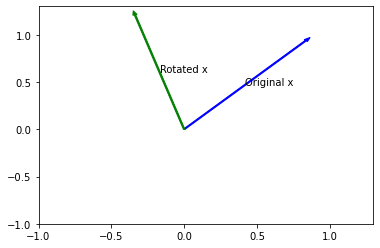

In [237]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(55)
x = torch.rand((2, 1))
print(f"A random 2D {x} magnitude {torch.norm(x):.2f}")

theta = torch.tensor(1)
rotation_matrix = torch.tensor([[torch.cos(theta), -torch.sin(theta)]
                                   ,[torch.sin(theta), torch.cos(theta)]]
                                  )
x_rotated = rotation_matrix @ x 

print(f"x rotated by {theta} degress {x_rotated} magnitude {torch.norm(x_rotated):.2f}")

# Plot the vectors
ax = plt.axes()

# extract numpy arrays
x_numpy  = x.squeeze(0).detach().numpy()
xr_numpy = x_rotated.squeeze(0).detach().numpy()

# reshape column vectors to row vectors and 
# remove extra dimension
x_numpy =  x_numpy.reshape(1,2).squeeze(0)
xr_numpy = xr_numpy.reshape(1,2).squeeze(0)

ax.arrow(0,0,*x_numpy,width=0.01,color="blue")
ax.annotate("Original x", xy=(x_numpy/2), xytext=(x_numpy/2),
            arrowprops=None)


ax.arrow(0,0,*xr_numpy,width=0.01,color="green")
ax.annotate("Rotated x", xy=(xr_numpy/2), xytext=(xr_numpy/2),
            arrowprops=None)
    
plt.xlim(-1.,1.3)
plt.ylim(-1.,1.3)
plt.show()


As you can see the vector x, is rotated by an angle of $\theta=1$. The orginal is shown by blue colored vector and the rotated is shown by green vector in the graph. The length of the vector remains unchanged.

In the previous chapter we demonstrted fixed position embedding and learned position embedding. In both the cases, we created an embedding vector for position of our token and added it to our word embedding.
In the previous section in this chapter, we saw that we used weight matrices to project the combined (token and positoin) embeddings into query, key and value matrices. 

Below python snippet mimics creation of a token embedding vector, followed by affine-transformation using a query weight matrix and subsequently deriving the query vector. For demonstration purposes we restrict the context length to three and embedding dimension to four

In [285]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(55)
context_length = 3
d_model = 4


def get_query_matrix(context_length, d_model):
    x = torch.rand((context_length, d_model))
    Wq = torch.nn.Linear(d_model, d_model, bias=False)
    q = Wq(x)
    return q

q = get_query_matrix(context_length, d_model)
print(q.shape)

torch.Size([3, 4])


Below is a figure from the paper RoFormer: Enhanced Transformer with Rotary Position Embedding {cite}

`su2023roformerenhancedtransformerrotary`.

```{figure} ../../images/chapter2/rope.png
---
height: 150px
name: rope-fig
---
Rotary Position Embedding
```


The embedding dimension is four. Each dimension is a feature. We have *two pairs of features* given our embedding dimension is four. Context length is set to three, hence we have four tokens, in position 1,2,and 3.



Each pair of the features will be rotated by a different $\theta$. 

$$
\Theta=\{\theta_i = 10000^{{-2\dot(i-1)}\over{d}}:i\in{1,2,\dots,\frac{d}{2}} \}
$$

So for our embedding dimension size of 4, we will have two $\theta$ values.

In [286]:
sliced_dimensions = torch.arange(0, d_model // 2, dtype=torch.float32)

theta = 10000**((-2.*sliced_dimensions)/d_model)
theta

tensor([1.0000, 0.0100])

Say our embedded dimension in the example of size 4 is represented as ${x_1,x_2,x_3,x_4}$, we rotate dimensions $(x_1,x_2)$ by $\theta=1$ and dimension $(x_3,x_4)$ by $\theta=0.01$. Now comes the position of the token.With a context length of three, we have three positions.

In [287]:
positions = torch.arange(1, context_length+1).unsqueeze(1)
positions

tensor([[1],
        [2],
        [3]])

Each position will scale these $\theta$ values as shown below.

In [288]:
m_theta = positions * theta
m_theta

tensor([[1.0000, 0.0100],
        [2.0000, 0.0200],
        [3.0000, 0.0300]])

You can see that the first row represents the scaled theta values for feature pairs $(x_1,x_2)$ and $(x_3,x_4)$. The figure from the paper explains this. In the figure the feature pair $(x_1,x_2)$ is rotated by $m\theta_1$, where $m$ is the position index and $\theta_1$ is the rotation angle for that feature pair.

Let us get the rotation matrix. For position, m = 1, the first token, for features $(x_1,x_2)$ the rotation matrix when multiplied by query/key vector looks like the following

$$
\begin{pmatrix}
\cos{m\theta} & -\sin{m\theta} \\
\sin{m\theta} &  \cos{m\theta} \\
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
\\
:m=1,\theta=1.0
$$



We calculate the sine and cosine values for all the tokens and their embedding pairs.

In [273]:
cos_values = torch.cos(m_theta)
sin_values = torch.sin(m_theta)
cos_values

tensor([[ 0.5403,  0.9999],
        [-0.4161,  0.9998],
        [-0.9900,  0.9996]])

Let us proceed to create a rotation matrix. We have one rotation matrix for each token. Fill the rotation matrix with sin and cosine values we have derived.

In [289]:
rotation_matrix = torch.zeros((context_length,d_model, d_model))
rotation_matrix

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

We will create our rotation matrix in such a way that, when we multiply our query/key matrix, the correct $\theta$ values will be applied.

$$
\begin{pmatrix}
\cos{m\theta} & -\sin{m\theta} & 0 & 0 \\
\sin{m\theta} &  \cos{m\theta} & 0 & 0 \\
 0 & 0 & \cos{m\theta} & -\sin{m\theta}  \\
 0 & 0 & \sin{m\theta} &  \cos{m\theta} 
\end{pmatrix}
\cdot
\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix}\\
$$
$$
\\
=
x_1\cdot\cos{m\theta} - x_1\cdot\sin{m\theta} + 0 + 0 \\
x_2\cdot\sin{m\theta} + x_2\cdot\cos{m\theta} + 0 + 0 \\
0 + 0 + x_3\cdot\cos{m\theta} - x_3\cdot\sin{m\theta} \\
0 + 0 + x_4\cdot\sin{m\theta} + x_4\cdot\cos{m\theta} 
$$

Let us now fill our rotation matrix. We know that cosine values are present in 0th row 0th column in all the matrices, similarly in 2nd row and 2nd column. And likewise for other entries.

In [290]:
rotation_matrix[:,[0,2],[0,2]]= cos_values
rotation_matrix[:,[0,2],[1,2]]= -sin_values
rotation_matrix[:,[1,3],[0,2]]= sin_values
rotation_matrix[:,[1,3],[1,3]]= cos_values


In [276]:
rotation_matrix

tensor([[[ 0.5403, -0.8415,  0.0000,  0.0000],
         [ 0.8415,  0.5403,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0100,  0.0000],
         [ 0.0000,  0.0000,  0.0100,  0.9999]],

        [[-0.4161, -0.9093,  0.0000,  0.0000],
         [ 0.9093, -0.4161,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0200,  0.0000],
         [ 0.0000,  0.0000,  0.0200,  0.9998]],

        [[-0.9900, -0.1411,  0.0000,  0.0000],
         [ 0.1411, -0.9900,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0300,  0.0000],
         [ 0.0000,  0.0000,  0.0300,  0.9996]]])

In [ ]:
We can now rotate our query and key matrices.

In [291]:
class MultiHeadAttentionv2(nn.Module):
    """
    Multihead Attention Implementation
    """
    def __init__(self, config):
        
        super().__init__()
        
        

        self.projection_out = nn.Linear(config.n_heads * config.d_head, config.d_head)    
        
        self.Wq =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)
        self.Wk =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)
        self.Wv =  nn.Linear(config.d_model, config.d_head * config.n_heads, bias=config.bias)
        
        self.rotation_matrix = torch.zeros(config.context_window, config.d_head, config.d_head)
        self.rotation_buffer = self.register_buffer("rotation_matrix", self.rotation_matrix)
        self.__init_rotation_matrix(config)
        
        self.attn_drop  = config.dropout
        self.n_heads    = config.n_heads
        self.d_head     = config.d_head
        self.__init_weights()


    def __init_weights(self):

        nn.init.xavier_uniform_(self.Wq.weight)
        nn.init.xavier_uniform_(self.Wk.weight)
        nn.init.xavier_uniform_(self.Wv.weight)
    
    def __init_rotation_matrix(self, config):
        
        positions = torch.arange(1, config.context_window + 1).unsqueeze(1)
        sliced_dimensions = torch.arange(0, config.d_head // 2, dtype=torch.float32)
        theta = 10000**((-2.*sliced_dimensions.float())/config.d_head)
        m_theta = positions * theta
        
        sin_values = torch.sin(m_theta)
        cos_values = torch.cos(m_theta)
        
        self.rotation_matrix[:,2*sliced_dimensions, 2*sliced_dimensions] = cos_values
        self.rotation_matrix[:,2*sliced_dimensions, 2*sliced_dimensions+1] = -sin_values
        self.rotation_matrix[:,2*sliced_dimensions+1, 2*sliced_dimensions] = sin_values
        self.rotation_matrix[:,2*sliced_dimensions+1, 2*sliced_dimensions+1] = cos_values


    def forward(self, x):

        batch, length, d = x.shape
        is_causal = True
        
        if not self.train:
            is_causal = False
            self.attn_drop = 0.0
        
        q = self.Wq(x)
        k = self.Wk(x)
        v = self.Wv(x)
        
        q = q.view(batch, length, self.n_heads, self.d_head)
        k = k.view(batch, length, self.n_heads, self.d_head)
        v = v.view(batch, length, self.n_heads, self.d_head)

        context_vector = scaled_dot_product_attention(
                                query = q
                               ,key   = k
                               ,value = v
                               ,attn_mask=None
                               ,dropout_p=self.attn_drop
                               ,is_causal=True, scale=None)

        context_vector = context_vector.contiguous().view(batch, length, self.d_head * self.n_heads)
        output = self.projection_out(context_vector)
        return output

## Llama architecture 


https://medium.com/@pranjalkhadka/llama-explained-a70e71e706e9

## Mistral Architecture

In [ ]:
A shared input/output embedding matrix [Press and Wolf, 2016] to
reduce memory usage for parameters